# Exploratory Data Analysis (EDA)

Подробный конспект по теме EDA, от основ до продвинутого уровня.


## 1. Что такое EDA и зачем он нужен
Exploratory Data Analysis (EDA) — это этап анализа данных, направленный на первичное исследование и понимание структуры, особенностей и качества данных.
- Понимание распределения данных и основных характеристик
- Обнаружение выбросов и аномалий
- Выявление пропущенных значений
- Определение взаимосвязей между переменными
- Подготовка данных для последующего моделирования

**Упрощённо:** EDA — это как осмотр автомобиля перед покупкой: проверяем основные параметры, ищем дефекты, чтобы принимать правильные решения.

## 2. Описательная статистика
- Среднее, медиана, мода, дисперсия, стандартное отклонение
- Среднее — арифметическое всех значений
- Медиана — значение, делящее данные пополам
- Мода — наиболее часто встречающееся значение
- Дисперсия и стандартное отклонение — меры разброса данных

Формулы:
```
mean = (1/n) * sum(x_i)
variance = (1/(n-1)) * sum((x_i - mean)^2)
std_dev = sqrt(variance)
```

**Пример:**

In [1]:
import pandas as pd
data = [10, 12, 12, 13, 12, 14, 16, 12, 13]
series = pd.Series(data)
print("Среднее:", series.mean())
print("Медиана:", series.median())
print("Мода:", series.mode()[0])
print("Дисперсия:", series.var())
print("Стандартное отклонение:", series.std())

Среднее: 12.666666666666666
Медиана: 12.0
Мода: 12
Дисперсия: 2.7499999999999996
Стандартное отклонение: 1.6583123951776997


## 3. Методы выявления выбросов
- Выброс — значение, сильно отклоняющееся от остальных данных
- Методы: boxplot, z-score, IQR

**Пример вычисления выбросов с помощью IQR:**

In [2]:
import numpy as np
data = [10, 12, 12, 13, 12, 14, 16, 12, 13]
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = [x for x in data if x < lower_bound or x > upper_bound]
print("Выбросы (IQR):", outliers)

Выбросы (IQR): [10, 16]


## 4. Работа с пропущенными значениями
- Удаление (dropna)
- Заполнение (fillna) средним, медианой, константой
- Методы ffill и bfill для заполнения вперед и назад

**Пример:**

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': [1, 2, np.nan, 4], 'B': [5, np.nan, np.nan, 8]})
df_drop = df.dropna()
df_fill = df.fillna(df.mean())
print("Оригинал:\n", df)
print("Удаление пропусков:\n", df_drop)
print("Заполнение средним:\n", df_fill)

Оригинал:
      A    B
0  1.0  5.0
1  2.0  NaN
2  NaN  NaN
3  4.0  8.0
Удаление пропусков:
      A    B
0  1.0  5.0
3  4.0  8.0
Заполнение средним:
           A    B
0  1.000000  5.0
1  2.000000  6.5
2  2.333333  6.5
3  4.000000  8.0


## 5. Первичная визуализация распределений
- Гистограмма
- KDE (Kernel Density Estimate)
- Boxplot

**Пример:**

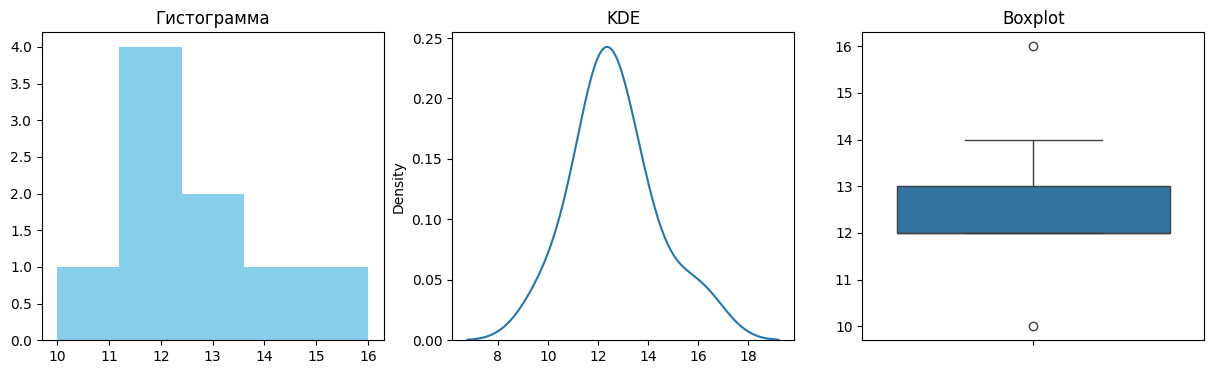

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
data = [10, 12, 12, 13, 12, 14, 16, 12, 13]
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.hist(data, bins=5, color='skyblue')
plt.title('Гистограмма')
plt.subplot(1,3,2)
sns.kdeplot(data)
plt.title('KDE')
plt.subplot(1,3,3)
sns.boxplot(data=data)
plt.title('Boxplot')
plt.show()

## 6. Современные библиотеки для EDA
- ydata-profiling
- Sweetviz

**Примеры:**

In [ ]:
import sweetviz as sv
import pandas as pd

df = pd.read_csv('SalesTarget.csv')
# Генерация отчёта
report = sv.analyze(df)
# Для отображения в Jupyter:
report.show_notebook()
# Или сохранить в HTML-файл:
# report.show_html('report.html')

In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd
# df = pd.read_csv('data.csv')
# profile = ProfileReport(df, title="Отчет EDA", explorative=True)
# profile.to_notebook_iframe()

In [ ]:
import sweetviz as sv
# report = sv.analyze(df)
# report.show_notebook()

## 7. Классические и новые подходы с примерами
- Классика: Pandas + Matplotlib + Seaborn (ручной код)
- Новые: ydata-profiling, Sweetviz (автоматические отчеты)

**Упрощённо:** Можно делать анализ вручную или использовать готовые инструменты — зависит от задачи и времени.

# Практические задания
1. Загрузите любой датасет (например, titanic.csv). Выведите описательную статистику для числовых столбцов.
2. Постройте boxplot для одного числового признака и найдите выбросы с помощью IQR.
3. Найдите и обработайте пропущенные значения в датасете, используя удаление и заполнение.
4. Визуализируйте распределение одного признака с помощью гистограммы и KDE-графика.
5. Создайте автоматический отчет с помощью ydata-profiling или sweetviz и проанализируйте ключевые моменты.